# Business <> Data Understanding

## Import & read

In [495]:
import numpy as np
import pandas as pd

ai = pd.read_csv('ai.csv')

## Examine

In [387]:
#Let's have a first look at data
ai.head()

,id,markets,founded in,employees,headquarters,country,total raised (USD),latest_round_amount (USD),latest_round_date,latest_round_type,acquired_by,acquired_at,acquired_amount (USD)
0,14,"Internet > Cloud Computing, Big Data > Storage...",1994.0,566000.0,Seattle,United States,56000000.0,48000000.0,1997-05-15,IPO,NaN,NaN,NaN
1,16,"Networking, Internet > Social Media, Mobile, E...",2003.0,10001.0,Sunnyvale,United States,206121421.0,81713488.0,2013-05-01,Post-IPO equity,Microsoft,2016-06-13,2.600000e+10
2,125,"Mobile, Technology > Artificial Intelligence, ...",1991.0,22000.0,Tokyo,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,213,"Mobile, Technology, Mobile > Mobile Software T...",2008.0,90.0,London,United Kingdom,21579688.0,17500000.0,2013-09-04,Series B,Microsoft,2016-02-02,2.500000e+08
4,215,"Technology > Artificial Intelligence, Telecomm...",1984.0,1001.0,Seoul,South Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
#replace spaces in column names by '_'
ai.columns = [c.replace(' ', '_') for c in ai.columns]
# remove '()' from column names
ai.columns = [c.replace('(', '') for c in ai.columns]
ai.columns = [c.replace(')', '') for c in ai.columns]

In [389]:
ai.head(1)

,id,markets,founded_in,employees,headquarters,country,total_raised_USD,latest_round_amount_USD,latest_round_date,latest_round_type,acquired_by,acquired_at,acquired_amount_USD
0,14,"Internet > Cloud Computing, Big Data > Storage...",1994.0,566000.0,Seattle,United States,56000000.0,48000000.0,1997-05-15,IPO,NaN,NaN,NaN


In [390]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 13 columns):
id                         3269 non-null int64
markets                    3269 non-null object
founded_in                 2601 non-null float64
employees                  2350 non-null float64
headquarters               2899 non-null object
country                    2930 non-null object
total_raised_USD           1708 non-null float64
latest_round_amount_USD    1748 non-null float64
latest_round_date          1684 non-null object
latest_round_type          1721 non-null object
acquired_by                133 non-null object
acquired_at                133 non-null object
acquired_amount_USD        129 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 332.1+ KB


In [391]:
#Have a look at the first record
ai.iloc[0]

id                                                                        14
markets                    Internet > Cloud Computing, Big Data > Storage...
founded_in                                                              1994
employees                                                             566000
headquarters                                                         Seattle
country                                                        United States
total_raised_USD                                                     5.6e+07
latest_round_amount_USD                                              4.8e+07
latest_round_date                                                 1997-05-15
latest_round_type                                                        IPO
acquired_by                                                              NaN
acquired_at                                                              NaN
acquired_amount_USD                                                      NaN

# Data preparation

## Clean-up and prepare the main dataframe


In [392]:
#Prepare a basic dataframe (without unnecessary columns) 
ai_clean = ai[["markets", 'founded_in', "total_raised_USD", 'country','headquarters', 'employees', 
              'latest_round_amount_USD', 'latest_round_type']]
ai_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 8 columns):
markets                    3269 non-null object
founded_in                 2601 non-null float64
total_raised_USD           1708 non-null float64
country                    2930 non-null object
headquarters               2899 non-null object
employees                  2350 non-null float64
latest_round_amount_USD    1748 non-null float64
latest_round_type          1721 non-null object
dtypes: float64(4), object(4)
memory usage: 204.4+ KB


In [393]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 13 columns):
id                         3269 non-null int64
markets                    3269 non-null object
founded_in                 2601 non-null float64
employees                  2350 non-null float64
headquarters               2899 non-null object
country                    2930 non-null object
total_raised_USD           1708 non-null float64
latest_round_amount_USD    1748 non-null float64
latest_round_date          1684 non-null object
latest_round_type          1721 non-null object
acquired_by                133 non-null object
acquired_at                133 non-null object
acquired_amount_USD        129 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 332.1+ KB


In [394]:
# convert funds raised from USD to USD milions
pd.options.mode.chained_assignment = None  # disable some warnings

ai_clean['total_raised_USD_milions'] = ai_clean['total_raised_USD']/1000000
ai_clean['latest_round_amount_USD_milions'] = ai_clean['latest_round_amount_USD']/1000000

In [395]:
ai_clean.drop(['total_raised_USD'], axis = 1, inplace = True)
ai_clean.drop(['latest_round_amount_USD'], axis = 1, inplace = True)

In [396]:
ai_clean.head(3)

,markets,founded_in,country,headquarters,employees,latest_round_type,total_raised_USD_milions,latest_round_amount_USD_milions
0,"Internet > Cloud Computing, Big Data > Storage...",1994.0,United States,Seattle,566000.0,IPO,56.000000,48.000000
1,"Networking, Internet > Social Media, Mobile, E...",2003.0,United States,Sunnyvale,10001.0,Post-IPO equity,206.121421,81.713488
2,"Mobile, Technology > Artificial Intelligence, ...",1991.0,Japan,Tokyo,22000.0,NaN,NaN,NaN


## Identify and categorise technologies and markets

In this section we extract technologies and industries from "markets" column.

At the moment it is a string of unordered tags. We will transform it into a large set of "dummy" variables: columns with names equal to tags and value = 1 in case company has it in a "market" column and 0 in case a given tag is absent.

### Visualize TAGs with wordcloud

Pure statistics are boring... Let's visualize the most popular TAGs with wordcloud!

In [397]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [398]:
text = ''
r = ai.shape[0]
for i in range(0, r):
    text = text + ai['markets'][i]

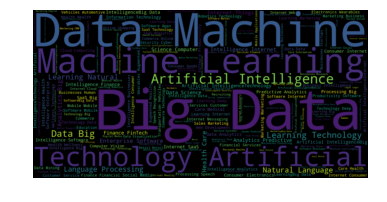

In [399]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#uncomment to store a picture ine a "wordclouds" subdir (have it created beforehand)
#wordcloud.to_file("wordclouds/1.png")

As you can see, "Big Data" dominates. Let's strip it to see what's under the cover...

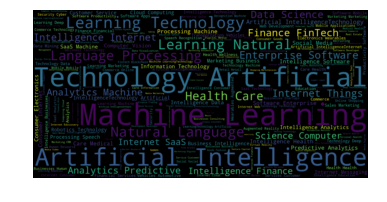

In [400]:
stripped = text.replace('Big Data', "")
wordcloud = WordCloud(width=1600, height=800).generate(stripped)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#wordcloud.to_file("wordclouds/2.png")


I encourage you to continue stripping the most visible TAGs. A very interesting patterns appear and, last but not least, that's a "real" data MINING :)

### Clean-up markets entries

Now it's time to identify TAGs out of the chaotic, large strings. We start with some basic cleansing.

In [401]:
# First, we extract a market column
markets = ai_clean['markets']
print(markets.head())
print(markets.shape)

0    Internet > Cloud Computing, Big Data > Storage...
1    Networking, Internet > Social Media, Mobile, E...
2    Mobile, Technology > Artificial Intelligence, ...
3    Mobile, Technology, Mobile > Mobile Software T...
4    Technology > Artificial Intelligence, Telecomm...
Name: markets, dtype: object
(3269,)


In [402]:
#Let's strip whitespaces and ">"
markets = markets.str.strip()
markets = markets.str.replace('>',',').str.lower()
markets = markets.str.replace(' ,',',')
markets = markets.str.replace(', ',',')
markets.head()

0    internet,cloud computing,big data,storage,inte...
1    networking,internet,social media,mobile,e-comm...
2    mobile,technology,artificial intelligence,tele...
3    mobile,technology,mobile,mobile software tools...
4    technology,artificial intelligence,telecommuni...
Name: markets, dtype: object

In [403]:
#Let's look at frequency of different phrases
markets.value_counts()

technology,artificial intelligence                                                                                                                                                                                                                                                           101
big data,machine learning                                                                                                                                                                                                                                                                     44
big data,machine learning,technology,artificial intelligence                                                                                                                                                                                                                                  33
robotics,technology,artificial intelligence                                                                                          

### Create dummy variables

Now it's time to create dummy variables. We will apply a dedicated Pandas function (pd.get_dummies())

In [404]:
markets = markets.str.get_dummies(sep=',')
markets.shape

(3269, 507)

We obtain more than 500 different tags...

In [405]:
markets.head()

,3d,3d printing,3d technology,accelerator,accounting,adtech,advertising,advertising platforms,aerospace,affiliates,...,web development,web hosting,web scraping,web service,web tools,webcare,weddings,wifi,wireless,writers
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Identify tags

In [406]:
markets.columns

Index(['3d', '3d printing', '3d technology', 'accelerator', 'accounting',
       'adtech', 'advertising', 'advertising platforms', 'aerospace',
       'affiliates',
       ...
       'web development', 'web hosting', 'web scraping', 'web service',
       'web tools', 'webcare', 'weddings', 'wifi', 'wireless', 'writers'],
      dtype='object', length=507)

In [407]:
markets.shape

(3269, 507)

### Identify categories

As you can see, there are some phrases (eg. '3d', 'advertising', etc.) which repeat over and over ...
These repeating words are good candidates for meta-categories. Let's find them.

First, let's identify these repeating words by counting their freqencies.

In [408]:
tags_list = []
for x in markets.columns:
    tags_list.extend(x.split(','))
    
tags_list = pd.unique(tags_list)
tags_list

array(['3d', '3d printing', '3d technology', 'accelerator', 'accounting',
       'adtech', 'advertising', 'advertising platforms', 'aerospace',
       'affiliates', 'agency', 'agriculture', 'algorithms', 'analytics',
       'android', 'api', 'app', 'app design', 'app development',
       'app marketing', 'app stores', 'application platforms', 'apps',
       'architecture', 'art', 'artificial intelligence', 'auctions',
       'audio', 'augmented reality', 'automotive', 'autonomous vehicles',
       'banking', 'beauty', 'beer', 'big data', 'big data analytics',
       'biometrics', 'biotechnology', 'bitcoin', 'blockchain',
       'blogging platforms', 'booking', 'brand marketing', 'broadcasting',
       'brokers', 'browser extensions', 'business analytics',
       'business development', 'business information systems',
       'business intelligence', 'business productivity',
       'business services', 'businesses', 'cad', 'calendars', 'cannabis',
       'career management', 'career plan

In [409]:
# Let's convert tags_list to sting and remove comma's
tags_list_string = ','.join(tags_list)
tags_list_string_no_comma = tags_list_string.replace(',',' ')

In [410]:
# ... and create a dictionary of tags with their counts
from collections import defaultdict
categories = defaultdict(int)
for w in tags_list_string_no_comma.split(' '):
    categories[w] += 1

In [411]:
# let's identify category candidates by sorting them by their counts
for w in sorted(categories, key=categories.get, reverse=True):
    print(w, categories[w])

social 21
management 20
marketing 18
mobile 13
services 12
data 11
web 10
media 9
business 8
security 8
content 8
search 8
health 8
online 8
video 8
technology 7
software 7
advertising 6
platforms 6
analytics 6
design 6
development 6
cloud 6
tools 6
tech 6
automation 6
and 6
app 5
information 5
communications 5
internet 5
service 5
learning 5
games 5
food 5
local 5
consumer 4
delivery 4
enterprise 4
sharing 4
home 4
travel 4
sales 4
3d 3
apps 3
intelligence 3
vehicles 3
businesses 3
energy 3
infrastructure 3
recruiting 3
real 3
hardware 3
discovery 3
support 3
digital 3
recognition 3
+ 3
network 3
networking 3
product 3
personal 3
photo 3
public 3
virtual 3
printing 2
architecture 2
reality 2
big 2
booking 2
systems 2
productivity 2
career 2
planning 2
chat 2
clean 2
computing 2
storage 2
estate 2
electronics 2
goods 2
optimization 2
crm 2
customer 2
science 2
visualization 2
dating 2
deep 2
developer 2
diagnostics 2
e-commerce 2
education 2
email 2
entertainment 2
event 2
exchanges 2


In [412]:
#Now, let's identify members of a given category
category = 'marketing'  # < change "marketing" to try different categories
for i in tags_list:
    if category in i:
        print(i)

app marketing
brand marketing
content marketing
digital marketing
direct marketing
email marketing
event marketing
internet marketing
marketing
marketing automation
marketing communications
marketing intelligence
mobile marketing
online marketing
performance marketing
sales and marketing
search marketing
social media marketing


In [413]:
# Here we create a list of the most "populated" categories and assign "C_" at their beginning.
top_categories = ['C_'+i for i in categories if categories[i] > 3]

In [414]:
print(top_categories[0:10])
print("Our top_categories list contains ", len(top_categories), " elements")

['C_technology', 'C_advertising', 'C_platforms', 'C_analytics', 'C_app', 'C_design', 'C_development', 'C_marketing', 'C_data', 'C_business']
Our top_categories list contains  43  elements


In [415]:
# let's make some cleaning, and remove non-informative categories
top_categories.remove('C_and')
top_categories.remove('C_technology')
top_categories.remove('C_tech')
top_categories.remove('C_services')

In [416]:
#Now it's time to compute aggregates: for a given category sum-up dummy variables from it's members
# We start by creating a dictionary with lists of category members for each category

cat_members = {}
for c in top_categories:
    cat_members[c] = []
    for t in tags_list: 
        if c[2:] in t:
            cat_members[c].append(t)

In [417]:
# Let's create columns summarizing dummy variables for each category
for c in cat_members:
        markets[c] = markets[cat_members[c]].sum(axis = 1)

In [418]:
markets.shape

(3269, 546)

In [419]:
#Let's identify categories with the highest number of companies
top_cats = {}
for i in markets.columns:
    if 'C_' in i:
        top_cats[i] = markets[i].sum()

In [420]:
#Let's find the most popular categories
for w in sorted(top_cats, key=top_cats.get, reverse=True):
    print(w, top_cats[w])

C_data 2485
C_learning 1829
C_internet 1032
C_software 937
C_analytics 873
C_health 488
C_marketing 438
C_mobile 390
C_service 365
C_business 354
C_media 309
C_consumer 292
C_social 247
C_enterprise 233
C_search 184
C_app 179
C_security 171
C_information 149
C_advertising 130
C_web 112
C_management 110
C_cloud 103
C_development 102
C_sales 84
C_tools 74
C_online 73
C_travel 73
C_automation 71
C_content 61
C_video 58
C_platforms 54
C_communications 54
C_design 53
C_food 49
C_home 49
C_games 36
C_sharing 16
C_delivery 15
C_local 12


In [421]:
#For the most common categories, let's see their members
for w in top_cats:
    if top_cats[w] > 200:
        print(w, cat_members[w], '\n')

C_analytics ['analytics', 'big data analytics', 'business analytics', 'mobile analytics', 'predictive analytics', 'text analytics'] 

C_marketing ['app marketing', 'brand marketing', 'content marketing', 'digital marketing', 'direct marketing', 'email marketing', 'event marketing', 'internet marketing', 'marketing', 'marketing automation', 'marketing communications', 'marketing intelligence', 'mobile marketing', 'online marketing', 'performance marketing', 'sales and marketing', 'search marketing', 'social media marketing'] 

C_data ['big data', 'big data analytics', 'cloud data services', 'data architecture', 'data centers', 'data integration', 'data mining', 'data science', 'data security', 'data visualization', 'databases', 'personal data'] 

C_business ['business analytics', 'business development', 'business information systems', 'business intelligence', 'business productivity', 'business services', 'businesses', 'local businesses', 'small and medium businesses', 'small business', 

We see that category "learning" should be split into education and technological sub-categories. 

That will require:
1. removing column "C_learning" from markets dataframe
2. adding to columns to markets dataframe: 
- "C_edu" with sum over 'e-learning', 'language learning','learning','social learning' 
- "C_machine_learning" with sum over 'machine learning', 'deep learning'

In [422]:
top_categories.remove('C_learning')

In [423]:
top_categories.append('C_edu')
top_categories.append('C_machine_learning')

In [424]:
#top_categories

In [425]:
cat_members['C_learning']

['deep learning',
 'e-learning',
 'language learning',
 'learning',
 'machine learning',
 'social learning']

In [426]:
del cat_members['C_learning']

In [427]:
cat_members['C_edu'] = ['e-learning', 'language learning','learning','social learning']
cat_members['C_machine_learning'] = ['machine learning', 'deep learning']

In [428]:
# Let's make some clearing
for i in markets.columns:
    if 'C_' in i:
        markets = markets.drop(i, axis = 1)

# Let's create columns summarizing dummy variables for each category
for c in cat_members:
        markets[c] = markets[cat_members[c]].sum(axis = 1)

In [429]:
top_cats = {}
for i in markets.columns:
    if 'C_' in i:
        top_cats[i] = markets[i].sum()

In [430]:
for w in sorted(top_cats, key=top_cats.get, reverse=True):
    print(w, top_cats[w])

C_data 2485
C_machine_learning 1792
C_internet 1032
C_software 937
C_analytics 873
C_health 488
C_marketing 438
C_mobile 390
C_service 365
C_business 354
C_media 309
C_consumer 292
C_social 247
C_enterprise 233
C_search 184
C_app 179
C_security 171
C_information 149
C_advertising 130
C_web 112
C_management 110
C_cloud 103
C_development 102
C_sales 84
C_tools 74
C_online 73
C_travel 73
C_automation 71
C_content 61
C_video 58
C_platforms 54
C_communications 54
C_design 53
C_food 49
C_home 49
C_edu 37
C_games 36
C_sharing 16
C_delivery 15
C_local 12


### Merge markets with main dataframe

Now, having a set of tags prepared for further computation, we will merge markets dataframe with our basic one.

In [431]:
ai_clean.head(1)

,markets,founded_in,country,headquarters,employees,latest_round_type,total_raised_USD_milions,latest_round_amount_USD_milions
0,"Internet > Cloud Computing, Big Data > Storage...",1994.0,United States,Seattle,566000.0,IPO,56.0,48.0


In [432]:
markets.head(1)

,3d,3d printing,3d technology,accelerator,accounting,adtech,advertising,advertising platforms,aerospace,affiliates,...,C_home,C_local,C_mobile,C_online,C_travel,C_video,C_social,C_sales,C_edu,C_machine_learning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [433]:
ai_clean = ai_clean.drop('markets', axis = 1)
ai_clean.head()

,founded_in,country,headquarters,employees,latest_round_type,total_raised_USD_milions,latest_round_amount_USD_milions
0,1994.0,United States,Seattle,566000.0,IPO,56.000000,48.000000
1,2003.0,United States,Sunnyvale,10001.0,Post-IPO equity,206.121421,81.713488
2,1991.0,Japan,Tokyo,22000.0,NaN,NaN,NaN
3,2008.0,United Kingdom,London,90.0,Series B,21.579688,17.500000
4,1984.0,South Korea,Seoul,1001.0,NaN,NaN,NaN


In [434]:
# Let's merge both dataframes
ai_clean = pd.concat([ai_clean, markets], axis = 1)

In [435]:
ai_clean.head(1)

,founded_in,country,headquarters,employees,latest_round_type,total_raised_USD_milions,latest_round_amount_USD_milions,3d,3d printing,3d technology,...,C_home,C_local,C_mobile,C_online,C_travel,C_video,C_social,C_sales,C_edu,C_machine_learning
0,1994.0,United States,Seattle,566000.0,IPO,56.0,48.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [436]:
ai_clean.shape

(3269, 554)

## Prepare dedicated dataframes

Our questions address topics like investments, geography, employments, etc. Unfortunately, our dataset doesn't contain complete informations for each company - it's rather sparse.

In [437]:
biz_cols = ['founded_in', "total_raised_USD_milions", 'country','headquarters', 'employees', 
              'latest_round_amount_USD_milions', 'latest_round_type']
ai_clean[biz_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 7 columns):
founded_in                         2601 non-null float64
total_raised_USD_milions           1708 non-null float64
country                            2930 non-null object
headquarters                       2899 non-null object
employees                          2350 non-null float64
latest_round_amount_USD_milions    1748 non-null float64
latest_round_type                  1721 non-null object
dtypes: float64(4), object(3)
memory usage: 178.9+ KB


That's why in order to answer our questions we will prepare dedicated dataframes.

In [438]:
ai_emp = ai_clean[ai_clean['employees'] > 0]
ai_fund = ai_clean[ai_clean['total_raised_USD_milions'] > 0]
ai_geo = ai_clean[ai_clean['country'].notnull()]
ai_age = ai_clean[ai_clean['founded_in'] > 1900]

In [439]:
ai_emp[biz_cols].info()
#ai_fund[biz_cols].info()
#ai_geo[biz_cols].info()
#ai_age[biz_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 3266
Data columns (total 7 columns):
founded_in                         2269 non-null float64
total_raised_USD_milions           1144 non-null float64
country                            2066 non-null object
headquarters                       2140 non-null object
employees                          2350 non-null float64
latest_round_amount_USD_milions    1156 non-null float64
latest_round_type                  1130 non-null object
dtypes: float64(4), object(3)
memory usage: 146.9+ KB


# Data analysis

Let's answer our questions

## Q1. Which technologies and markets are the most popular?

### Top tech and markets by number of companies
We will identify them by counting the number of companies using given technology

In [440]:
top_markets = markets.sum()

In [441]:
top_markets.nlargest(20)

C_data                         2485
technology                     2278
artificial intelligence        2170
big data                       1947
C_machine_learning             1792
machine learning               1724
C_internet                     1032
C_software                      937
C_analytics                     873
internet                        682
software                        644
analytics                       527
C_health                        488
C_marketing                     438
C_mobile                        390
natural language processing     375
C_service                       365
C_business                      354
finance                         350
C_media                         309
dtype: int64

As we can see, in our computations categories (starting wi "C_") mix with TAGs. So let's split them.

In [442]:
# split categories and tag's
cats = [col for col in markets.columns if 'C_' in col]
cats[0:5]

['C_advertising', 'C_platforms', 'C_analytics', 'C_app', 'C_design']

In [443]:
tags = [col for col in markets.columns if 'C_' not in col]
tags[0:5]

['3d', '3d printing', '3d technology', 'accelerator', 'accounting']

In [444]:
top_markets = markets[tags].sum()
top_categories = markets[cats].sum()

TOP 20 markets (in terms of number of companies) are:

In [445]:
top_markets.nlargest(20)

technology                     2278
artificial intelligence        2170
big data                       1947
machine learning               1724
internet                        682
software                        644
analytics                       527
natural language processing     375
finance                         350
data science                    245
saas                            242
marketing                       238
mobile                          236
internet of things              220
enterprise software             208
fintech                         208
health care                     199
businesses                      195
e-commerce                      194
predictive analytics            178
dtype: int64

TOP 20 categories (in terms of number of companies) are:

In [446]:
top_categories.nlargest(20)

C_data                2485
C_machine_learning    1792
C_internet            1032
C_software             937
C_analytics            873
C_health               488
C_marketing            438
C_mobile               390
C_service              365
C_business             354
C_media                309
C_consumer             292
C_social               247
C_enterprise           233
C_search               184
C_app                  179
C_security             171
C_information          149
C_advertising          130
C_web                  112
dtype: int64

### Top tech and markets by investments
Now let's find categories and TAGs with largest investments.

We take tag_value as a sum of total_rised_USD by all companies having this tag

Let's start with TOP invested TAGs (technnologies and markets)

In [447]:
tag_invest_total = {}
for i in pd.Index(tags):
    tag_invest_total[i] = (ai_fund[i]*ai_fund['total_raised_USD_milions']).sum()

In [448]:
tag_invest_total

{'3d': 52.453272000000005,
 '3d printing': 10.08427,
 '3d technology': 11.65,
 'accelerator': 103.0,
 'accounting': 63.830386000000004,
 'adtech': 113.124078,
 'advertising': 628.541718,
 'advertising platforms': 112.535845,
 'aerospace': 26.234457999999997,
 'affiliates': 0.0,
 'agency': 0.07,
 'agriculture': 275.704362,
 'algorithms': 28.258493999999995,
 'analytics': 4697.467885,
 'android': 0.0,
 'api': 7.890621,
 'app': 1.6495,
 'app design': 1.525,
 'app development': 14.624835000000001,
 'app marketing': 0.0,
 'app stores': 0.0,
 'application platforms': 3.749861,
 'apps': 288.31826800000005,
 'architecture': 24.4,
 'art': 2.0,
 'artificial intelligence': 17104.713749000002,
 'auctions': 0.0,
 'audio': 240.775612,
 'augmented reality': 764.1164900000001,
 'automotive': 823.937696,
 'autonomous vehicles': 739.436256,
 'banking': 50.075742000000005,
 'beauty': 16.009639,
 'beer': 0.0,
 'big data': 16523.189415,
 'big data analytics': 641.7138389999999,
 'biometrics': 43.05,
 'biot

Let's sort TAGs to indentify these with largest investments.

In [449]:
sorted_tag_invest_total = sorted(tag_invest_total.items(), key=lambda x: x[1], reverse = True)

TOP 20 technologies and markets are:

In [450]:
sorted_tag_invest_total[0:20]

[('technology', 18171.910257),
 ('artificial intelligence', 17104.713749000002),
 ('big data', 16523.189415),
 ('machine learning', 15532.393455),
 ('internet', 5175.871937),
 ('analytics', 4697.467885),
 ('software', 4296.439063),
 ('security', 3957.19718),
 ('data science', 3033.2535980000002),
 ('identity', 2998.75),
 ('image recognition', 2993.832136),
 ('robotics', 2499.276239),
 ('computer vision', 2497.678113),
 ('health care', 1955.961599),
 ('finance', 1950.8984020000003),
 ('web development', 1885.27183),
 ('information technology', 1842.794858),
 ('transportation', 1805.864109),
 ('mobile', 1723.3207689999997),
 ('natural language processing', 1523.396309)]

Now, let's look at categories.

In [451]:
cats_invest_total = {}
for i in pd.Index(cats):
    cats_invest_total[i] = (ai_fund[i]*ai_fund['total_raised_USD_milions']).sum()

sorted_cats_invest_total = sorted(cats_invest_total.items(), key=lambda x: x[1], reverse = True)

TOP 20 categories are:

In [452]:
sorted_cats_invest_total[0:20]

[('C_data', 21045.843376),
 ('C_machine_learning', 15726.940607999999),
 ('C_analytics', 6586.415987),
 ('C_internet', 6209.907324000001),
 ('C_software', 6181.464486000001),
 ('C_security', 4585.027787000001),
 ('C_health', 3074.280185),
 ('C_information', 2541.3824099999997),
 ('C_development', 2291.3817499999996),
 ('C_mobile', 2227.420545),
 ('C_web', 1955.3175569999999),
 ('C_search', 1763.562441),
 ('C_service', 1667.153018),
 ('C_enterprise', 1607.372237),
 ('C_media', 1455.6116069999998),
 ('C_consumer', 1422.2685040000001),
 ('C_marketing', 1342.537476),
 ('C_advertising', 1105.221268),
 ('C_business', 1066.6370980000002),
 ('C_cloud', 753.767228)]

### Which markets attract most of employees?

Now, let's find which technologies and markets attract the largest number of employees. 

We will compute # employees employed by companies described by this tag.

In [453]:
# App. 1,2 mln of employees work in AI companies
ai_emp['employees'].sum()

1208344.0

Let's identify most populated categories

In [454]:
cats_emp_total = {}
for i in pd.Index(cats):
    cats_emp_total[i] = (ai_emp[i]*ai_emp['employees']).sum()

sorted_cats_emp_total = sorted(cats_emp_total.items(), key=lambda x: x[1], reverse = True)

In [455]:
tags_emp_total = {}
for i in pd.Index(tags):
    tags_emp_total[i] = (ai_emp[i]*ai_emp['employees']).sum()

sorted_tags_emp_total = sorted(tags_emp_total.items(), key=lambda x: x[1], reverse = True)
sorted_tags_emp_total

[('technology', 1060177.0),
 ('artificial intelligence', 1058748.0),
 ('big data', 767717.0),
 ('internet', 587750.0),
 ('cloud computing', 568436.0),
 ('web development', 567307.0),
 ('information services', 567221.0),
 ('storage', 566009.0),
 ('finance', 377160.0),
 ('services', 372678.0),
 ('businesses', 365388.0),
 ('financial services', 363345.0),
 ('health', 360836.0),
 ('business services', 360081.0),
 ('consulting', 353540.0),
 ('communications', 350099.0),
 ('machine learning', 179085.0),
 ('big data analytics', 92318.0),
 ('deep learning', 90701.0),
 ('telecommunications', 62262.0),
 ('mobile', 45317.0),
 ('information technology', 31508.0),
 ('natural language processing', 26296.0),
 ('speech recognition', 23411.0),
 ('e-commerce', 22130.0),
 ('transportation', 21751.0),
 ('consumer electronics', 21436.0),
 ('vehicles', 21350.0),
 ('wearables', 21039.0),
 ('automotive', 21038.0),
 ('energy', 20213.0),
 ('security', 20205.0),
 ('analytics', 18218.0),
 ('internet of things', 1

TOP 20 most populated categories are:

In [456]:
sorted_cats_emp_total[0:20]

[('C_service', 1676187.0),
 ('C_data', 886110.0),
 ('C_business', 732200.0),
 ('C_internet', 604150.0),
 ('C_information', 599210.0),
 ('C_cloud', 568701.0),
 ('C_web', 568137.0),
 ('C_development', 567841.0),
 ('C_communications', 412439.0),
 ('C_health', 374854.0),
 ('C_machine_learning', 269786.0),
 ('C_analytics', 113742.0),
 ('C_mobile', 47723.0),
 ('C_security', 31512.0),
 ('C_marketing', 30063.0),
 ('C_consumer', 23624.0),
 ('C_sales', 21448.0),
 ('C_software', 17091.0),
 ('C_media', 13331.0),
 ('C_social', 13208.0)]

## Q2. How do AI investors invest their funds?


### Basic investments statistics

Let's start with basic investment statistics

In [457]:
ai_fund['total_raised_USD_milions'].describe()

count    1481.000000
mean       18.141217
std       103.993026
min         0.000001
25%         0.780000
50%         3.000000
75%        11.000000
max      2917.000000
Name: total_raised_USD_milions, dtype: float64

Let's classify companies investment size basing on terciles

In [458]:
ai_fund['inv_size'] = pd.qcut(ai_fund['total_raised_USD_milions'], 3, labels=["small", "medium", "large"])

In [459]:
# Want more stats?
ai_fund[ai_fund['inv_size'] == 'small'][biz_cols].describe()
#ai_fund[ai_fund['inv_size'] == 'medium'][biz_cols].describe()
#ai_fund[ai_fund['inv_size'] == 'large'][biz_cols].describe()

,founded_in,total_raised_USD_milions,employees,latest_round_amount_USD_milions
count,407.000000,494.000000,347.000000,487.000000
mean,2013.609337,0.478176,9.394813,0.410192
std,7.758181,0.410840,31.274050,0.397275
min,1868.000000,0.000001,2.000000,0.000000
25%,2013.000000,0.106500,2.000000,0.065444
50%,2014.000000,0.372335,3.000000,0.250000
75%,2016.000000,0.779540,11.000000,0.700000
max,2019.000000,1.351351,501.000000,1.351351


### Investments by Geography

#### Which countries has the largest number of AI companies?

In [460]:
ai_clean['country'].value_counts().head(15)

United States      1067
United Kingdom      340
The Netherlands     147
Germany             116
Canada              109
India               107
France              107
Finland              98
Spain                84
China                81
Israel               77
Sweden               58
Switzerland          28
Denmark              27
Italy                27
Name: country, dtype: int64

It looks like China is underrepresented...

#### Which countries invest most in AI?

In [461]:
inv_by_country = ai_fund.groupby('country')['total_raised_USD_milions'].sum()

TOP 15 countries investing in AI:

In [462]:
inv_by_country.sort_values(ascending = False).head(15)

country
United States     12816.463248
China              7984.260078
United Kingdom     1809.631208
Israel              753.917280
Canada              614.921299
France              571.492984
Germany             389.898256
Sweden              319.253152
Japan               273.675637
India               143.586644
Finland             126.353360
Spain               121.472980
Estonia             116.098927
Taiwan               84.906977
Singapore            71.860360
Name: total_raised_USD_milions, dtype: float64

Now, let's plot these investments on the map...

We start with reading in a file with geo-coordinates of different countries.

In [464]:
countries = pd.read_csv('countries.csv', names=['country', 'lat', 'lon'])
countries.head()

,country,lat,lon
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Andorra,42.506285,1.521801
4,Angola,-11.202692,17.873887


In [465]:
countries[countries['country'] == 'United States of America']

,country,lat,lon
185,United States of America,37.09024,-95.712891


In [466]:
# must change a name of USA in "country" column
countries.country.replace('United States of America', 'United States', inplace = True)
countries[countries['country'] == 'United States']

,country,lat,lon
185,United States,37.09024,-95.712891


In [467]:
inv_by_country_top_15 = inv_by_country.sort_values(ascending = False).head(15).to_frame()

In [468]:
inv_by_country_top_15['country'] = inv_by_country_top_15.index
inv_by_country_top_15

,total_raised_USD_milions,country
country,,
United States,12816.463248,United States
China,7984.260078,China
United Kingdom,1809.631208,United Kingdom
Israel,753.917280,Israel
Canada,614.921299,Canada
France,571.492984,France
Germany,389.898256,Germany
Sweden,319.253152,Sweden
Japan,273.675637,Japan


In [469]:
inv_by_country_top_15_geo = pd.merge(inv_by_country_top_15, countries,on='country',how='inner')

/Applications/Anaconda/anaconda/envs/drlnd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


TOP 15 countries investing most in AI are [values in USD milions]:

In [470]:
inv_by_country_top_15_geo

,total_raised_USD_milions,country,lat,lon
0,12816.463248,United States,37.090240,-95.712891
1,7984.260078,China,35.861660,104.195397
2,1809.631208,United Kingdom,55.378051,-3.435973
3,753.917280,Israel,31.046051,34.851612
4,614.921299,Canada,56.130366,-106.346771
5,571.492984,France,46.227638,2.213749
6,389.898256,Germany,51.165691,10.451526
7,319.253152,Sweden,60.128161,18.643501
8,273.675637,Japan,36.204824,138.252924
9,143.586644,India,20.593684,78.962880


In [471]:
import folium
data = inv_by_country_top_15_geo
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

for i in range(0, len(data)):
    folium.CircleMarker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup = data.iloc[i]['country'],
        radius = int(data.iloc[i]['total_raised_USD_milions']/80),
        color='crimson',
        fill=True,
        fill_color='crimson'
        ).add_to(m)
    
m


#### Where is the best place to set-up an AI company?

In [472]:
# Investments by city
inv_by_hq = ai_clean.groupby('headquarters')['total_raised_USD_milions'].sum()

Top 15 cities investing most in AI are:

In [473]:
inv_by_hq.sort_values(ascending = False).head(15)

headquarters
Beijing                6414.354979
San Francisco          1966.617663
Chicago                1894.870000
London                 1097.827790
New York               1055.813421
Cambridge               702.196933
Seattle                 565.529719
Palo Alto               537.116762
Boston                  536.657033
Paris                   488.343241
Tel Aviv                383.697280
Santa Clara             373.485000
South San Francisco     365.195000
Bristol                 347.714342
Sunnyvale               291.997694
Name: total_raised_USD_milions, dtype: float64

Top 15 cities with the largest number of AI companies are:

In [474]:
# No of companies by city
ai_clean['headquarters'].value_counts().head(15)

London           237
San Francisco    206
New York         141
Amsterdam         77
Paris             74
Berlin            63
Palo Alto         56
Helsinki          54
Toronto           42
Tel Aviv          34
Boston            31
Seattle           29
Cambridge         28
Barcelona         28
Madrid            27
Name: headquarters, dtype: int64

### Investment rounds

#### What are the most common latest round types?

In [475]:
ai_clean['latest_round_type'].value_counts()

Seed fund                680
Series A                 319
Venture Capital          177
Series B                 129
Angel                    123
Undisclosed funding       60
Undisclosed               47
Venture capital           36
Series C                  34
Grant                     25
Debt financing            24
Private equity            16
Series D                  15
Equity crowdfunding        9
Convertible Note           8
ICO                        4
Post-IPO equity            4
Crowdfunding               3
Series E                   3
Series UNDISCLOSED         2
IPO                        1
Token sale                 1
Non Equity Assistance      1
Name: latest_round_type, dtype: int64

#### Which round types attract most funds?

In [476]:
# Investments by latest round - total
inv_by_round = ai_clean.groupby('latest_round_type')['total_raised_USD_milions'].sum()
inv_by_round.sort_values(ascending = False)

latest_round_type
Series B                 5652.564144
Series D                 4827.004750
Series A                 4391.270360
Venture Capital          4239.202192
Series C                 2486.521016
Private equity           2138.392954
Seed fund                1066.113997
Series E                  392.900000
Undisclosed funding       376.832186
Angel                     265.396567
Post-IPO equity           244.201421
Venture capital           240.005618
Debt financing            239.847395
Undisclosed               108.814415
IPO                        56.000000
ICO                        50.120000
Equity crowdfunding        32.250127
Series UNDISCLOSED         17.975000
Grant                      12.103461
Token sale                  5.500000
Convertible Note            3.728295
Crowdfunding                2.813743
Non Equity Assistance       0.300000
Name: total_raised_USD_milions, dtype: float64

In [477]:
# Investments by latest round - mean
inv_by_round_mean = ai_clean.groupby('latest_round_type')['total_raised_USD_milions'].mean()
inv_by_round_mean.sort_values(ascending = False)

latest_round_type
Series D                 321.800317
Private equity           133.649560
Series E                 130.966667
Series C                  73.132971
Post-IPO equity           61.050355
IPO                       56.000000
Series B                  43.818327
Venture Capital           24.224013
Series A                  14.029618
ICO                       12.530000
Debt financing            10.902154
Series UNDISCLOSED         8.987500
Undisclosed funding        8.972195
Venture capital            6.857303
Token sale                 5.500000
Equity crowdfunding        3.583347
Undisclosed                2.315200
Angel                      2.230223
Seed fund                  1.642703
Crowdfunding               0.937914
Grant                      0.526237
Convertible Note           0.466037
Non Equity Assistance      0.300000
Name: total_raised_USD_milions, dtype: float64

In [478]:
#Now, let's take a closer look at the Series B investments
ai_seriesB = ai_clean[ai_clean['latest_round_type'] == 'Series B']
ai_seriesB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 3 to 3259
Columns: 554 entries, founded_in to C_machine_learning
dtypes: float64(4), int64(547), object(3)
memory usage: 559.3+ KB


In [479]:
top_markets_seriesB = ai_seriesB[tags].sum()
top_categories_seriesB = ai_seriesB[cats].sum()

TOP 10 technologies/markets with Series B investments are:

In [480]:
top_markets_seriesB.nlargest(10)

technology                     82
artificial intelligence        80
big data                       77
machine learning               71
software                       30
analytics                      22
internet                       18
enterprise software            12
natural language processing    12
data science                    9
dtype: int64

TOP 10 TAG categories with Series B investments are:

In [481]:
top_categories_seriesB.nlargest(10)

C_data                96
C_machine_learning    72
C_software            47
C_analytics           37
C_internet            28
C_enterprise          14
C_health              14
C_security            13
C_marketing           10
C_consumer            10
dtype: int64

## Q3. What are the employment patterns?

### Basic employment statistics

In [482]:
ai_emp['employees'].describe()

count      2350.000000
mean        514.188936
std       13876.360424
min           1.000000
25%           2.000000
50%           8.000000
75%          11.000000
max      566000.000000
Name: employees, dtype: float64

Let's classify companies employment size basing on terciles

In [483]:
ai_emp['emp_size'] = pd.qcut(ai_emp['employees'], 3, labels=["small", "medium", "large"])

In [484]:
ai_emp[['employees', 'total_raised_USD_milions']][ai_emp['emp_size'] == 'small'].describe()
#ai_emp[['employees', 'total_raised_USD_milions']][ai_emp['emp_size'] == 'medium'].describe()
#ai_emp[['employees', 'total_raised_USD_milions']][ai_emp['emp_size'] == 'large'].describe()

,employees,total_raised_USD_milions
count,898.000000,392.000000
mean,1.986637,4.066185
std,0.114888,8.777535
min,1.000000,0.000000
25%,2.000000,0.059368
50%,2.000000,0.928684
75%,2.000000,3.025000
max,2.000000,55.500000


Now, let's check employment statistics of small, medium and large (in terms of investments) companies.

In [485]:
ai_fund[['employees', 'total_raised_USD_milions']][ai_fund['inv_size'] == 'small'].describe()

,employees,total_raised_USD_milions
count,347.000000,494.000000
mean,9.394813,0.478176
std,31.274050,0.410840
min,2.000000,0.000001
25%,2.000000,0.106500
50%,3.000000,0.372335
75%,11.000000,0.779540
max,501.000000,1.351351


In [486]:
ai_fund[['employees', 'total_raised_USD_milions']][ai_fund['inv_size'] == 'medium'].describe()

,employees,total_raised_USD_milions
count,331.000000,494.000000
mean,17.274924,3.356404
std,63.693584,1.653068
min,2.000000,1.353791
25%,2.000000,2.000000
50%,11.000000,3.000000
75%,11.000000,4.500000
max,1001.000000,7.500000


In [487]:
ai_fund[['employees', 'total_raised_USD_milions']][ai_fund['inv_size'] == 'large'].describe()

,employees,total_raised_USD_milions
count,318.000000,493.000000
mean,1857.990566,50.654888
std,31740.465551,175.888164
min,2.000000,7.516981
25%,11.000000,11.000000
50%,11.000000,18.000000
75%,51.000000,37.120000
max,566000.000000,2917.000000


### How much one AI employee is worth, on average?

In [488]:
# Let's define "employee value" as a ratio of investment by # of employees. 
# And create a dedicated column
ai_fund['employee_value'] = ai_fund['total_raised_USD_milions']/ai_fund['employees']

In [489]:
ai_fund['employee_value'].describe()

count    9.960000e+02
mean     1.470643e+00
std      3.731062e+00
min      5.000000e-07
25%      9.318495e-02
50%      3.258333e-01
75%      1.073346e+00
max      4.568182e+01
Name: employee_value, dtype: float64

What is the highest employee valuation?

In [490]:
ai_fund['employee_value'].nlargest(10)

798     45.681818
254     42.727273
1920    27.750000
1993    27.350000
178     25.785000
151     25.000000
1354    24.000000
1336    20.396187
752     19.500000
2192    19.454545
Name: employee_value, dtype: float64

### Which competencies are the most valuable?

Let's identify tags and categories most popular among companies in the 4th quartile of employee value (4-th quartile = 1 mln USD)


In [491]:
top_markets_emp_value = ai_fund[ai_fund['employee_value'] > 1][tags].sum()

TOP 10 most popular markets and technologies among companies with the highest valuation of employee are:

In [492]:
top_markets_emp_value.nlargest(10)

big data                       184
machine learning               173
technology                     147
artificial intelligence        138
software                        65
analytics                       56
internet                        49
data science                    28
health care                     26
natural language processing     24
dtype: int64

In [493]:
top_categories_emp_value = ai_fund[ai_fund['employee_value'] > 1][cats].sum()

TOP 10 most popular TAG categories among companies with the highest valuation of employee are:

In [494]:
top_categories_emp_value.nlargest(10)

C_data                232
C_machine_learning    173
C_software             92
C_analytics            81
C_internet             65
C_health               39
C_security             32
C_marketing            28
C_enterprise           25
C_mobile               22
dtype: int64